# Import necessary packages and data files

In [66]:
# import packages
from ema_workbench import ema_logging, load_results, Scenario
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = './data/results_step3_vent_final.tar.gz' 
experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\pmg00\Documents\EPA Master program\EPA Master Thesis\Vensim Models\EMA Workbench connection\data\results_step3_vent_final.tar.gz


In [67]:
from ema_workbench.analysis.pairs_plotting import pairs_density, pairs_lines, pairs_scatter

In [68]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis.plotting import lines, Density,kde_over_time, envelopes, multiple_densities

In [69]:
from ema_workbench.analysis import (prim, dimensional_stacking)

In [70]:
#change naming of variables to make graphs more clear where necessary
experiments =experiments.rename({'Transportation time direct tender ventilator':'Delay in raw mat. procurement direct tender'}, axis=1)

In [71]:
experiments =experiments.rename({'Transportation time domestic production':'Delay in raw mat. procurement domestic production'}, axis=1)

In [73]:
# drop decision levers from experiment frame
experiments = experiments.drop(['Switch procurement world market ventilator',
'Switch direct tender ventilators',
'Switch innovation process ventilator',
'Switch loaning ventilators',
'Switch domestic production ventilators',
'Direct tender set up time ventilator',
'Check up time',
'Delay domestic production setup ventilator',
'Delivery time of ventilators stockpiling',
'Procurement time ventilators worldwide',
'Preparation time for delivery',
'Time to check products',
'Shipment time to hospitals',
'Order buffer procurement world market vent',
'Order buffer direct tender vent',
'Order buffer domestic production',
'Order buffer innovation',
'Time to establish loaning process',
'Time horizon for forecast',
'Urgentness',
'Initial ventilators in stockpile'], axis =1)


# Explore Outcomes of Experiments with Candidate Policy

[MainProcess/INFO] Coverage ventilator not shown because it is not time series data


(<Figure size 432x288 with 1 Axes>,
 {'Normalized shortage of ventilators': <AxesSubplot:title={'center':'Shortage of Ventilators over time'}, xlabel='Time', ylabel='Shortage of ventilators in %'>})

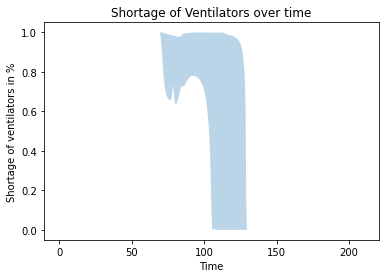

In [74]:
envelopes(experiments, outcomes,outcomes_to_show=['Normalized shortage of ventilators'], grouping_specifiers=None, density=None, fill=True, legend=True, titles={'Normalized shortage of ventilators':'Shortage of Ventilators over time'}, ylabels={'Normalized shortage of ventilators':'Shortage of ventilators in %'}, log=False)

[MainProcess/INFO] Coverage ventilator not shown because it is not time series data
[MainProcess/WARNING] singular matrix
c:\users\pmg00\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\plotting_util.py:364: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] sing

[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess

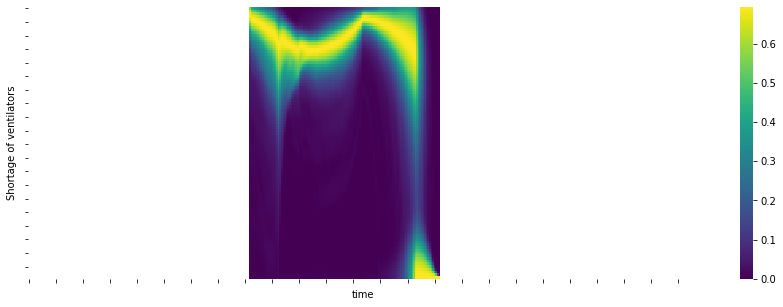

In [7]:
kde_over_time(experiments, outcomes, outcomes_to_show=['Normalized shortage of ventilators'], group_by=None, grouping_specifiers=None, colormap='viridis', log=True)
fig = plt.gcf()

fig.set_size_inches(15,5)
ax = fig.get_axes()

ax[0].set_ylabel('Shortage of ventilators')

plt.savefig('figures/kde_shortages_ventilator_step3.png')

[MainProcess/INFO] Coverage ventilator not shown because it is not time series data


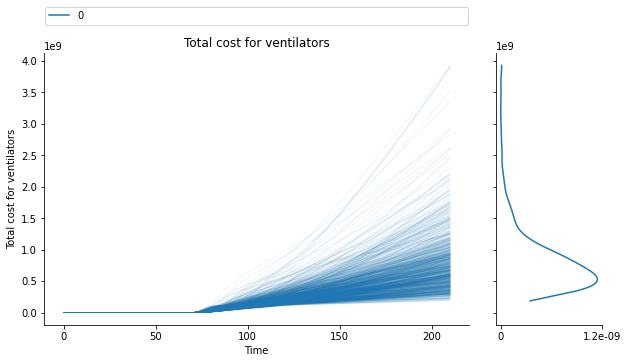

In [8]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total cost for ventilators', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

[MainProcess/INFO] Coverage ventilator not shown because it is not time series data


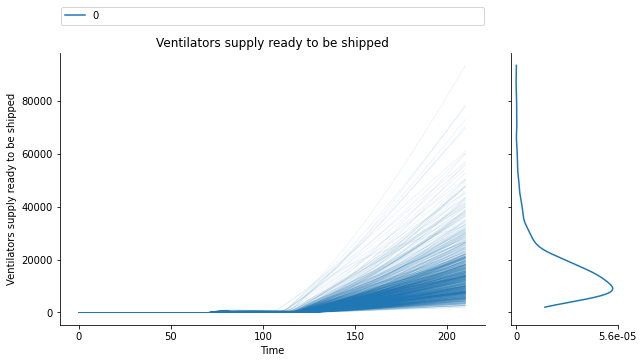

In [9]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Ventilators supply ready to be shipped', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

## Scenario Discovery Worst Case

In [75]:
# identify the threshold for 35% of the worst cases
df_outcome = outcomes['Coverage ventilator']
df_outcome = pd.DataFrame(df_outcome)
low_35_percent = df_outcome.quantile(0.35, axis = 0)

In [76]:
low_35_percent = low_35_percent.to_frame()
low_35_percent = low_35_percent[0.35].values[0]

In [77]:
#defiing the worst case for coverage ventilators
y = outcomes['Coverage ventilator'] <low_35_percent

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 1000 points remaining, containing 350 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.108, coverage: 0.30857142857142855, density: 1.0 restricted_dimensions: 9


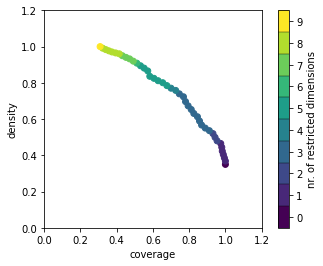

In [78]:
#plotting the trade off between coverage and density
prim_alg = prim.Prim(experiments, y, threshold  = 0.8) 
box1 = prim_alg.find_box()

box1.show_tradeoff()
# plt.savefig("./figures/prim_box_vent.png")
plt.show()

In [79]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.350000,0,1.000,0.350000,0
1,1.000000,0.368421,1,0.950,0.368421,1
2,0.994286,0.385809,2,0.902,0.385809,1
3,0.988571,0.404206,3,0.856,0.404206,1
4,0.982857,0.423124,4,0.813,0.423124,1
5,0.980000,0.444301,5,0.772,0.444301,1
6,0.974286,0.465211,6,0.733,0.465211,1
7,0.954286,0.479885,7,0.696,0.479885,2
8,0.942857,0.499244,8,0.661,0.499244,2
9,0.931429,0.519936,9,0.627,0.519936,2


### Inspect Box 20 

coverage    0.745714
density     0.739377
id                20
mass           0.353
mean        0.739377
res_dim            3
Name: 20, dtype: object

                                                      box 20              \
                                                         min         max   
Base production capacity direct tender ventilator  50.302070  257.947595   
Shipment time direct tender                        33.572252  119.940069   
Share of faulty products                            0.026450    0.499568   

                                                                                   
                                                                        qp values  
Base production capacity direct tender ventilator   [-1.0, 5.881878753170149e-35]  
Shipment time direct tender                        [0.00017490408958849987, -1.0]  
Share of faulty products                              [0.18680742908597295, -1.0]  



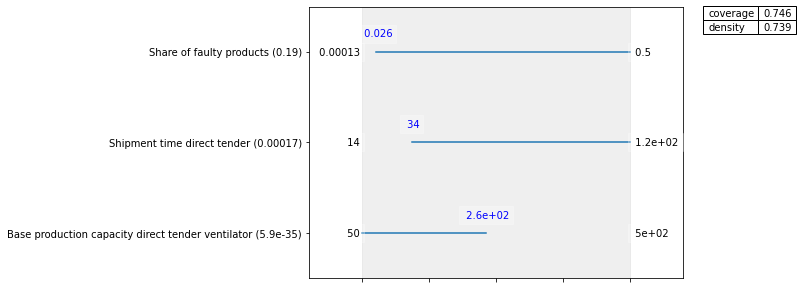

In [80]:
#inspecting boxes
box1.inspect(20)
box1.inspect(20, style='graph')
fig = plt.gcf()
fig.set_size_inches(8,5)
# plt.savefig("./figures/prim_box20_inspect_vent_worstcase.png")
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


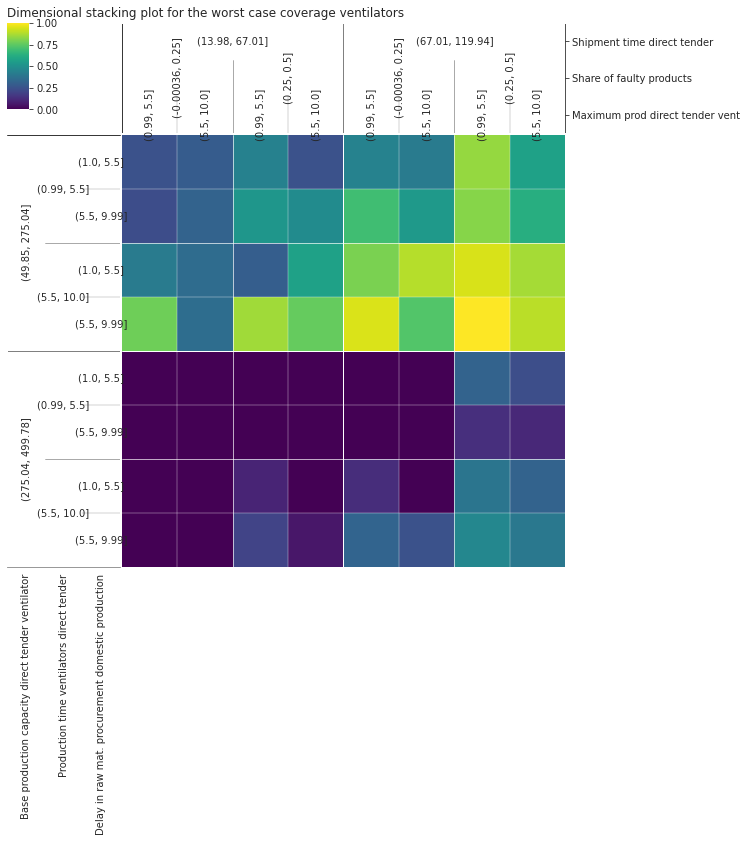

In [81]:
dimensional_stacking.create_pivot_plot(experiments, y, nbins =2, bin_labels=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Dimensional stacking plot for the worst case coverage ventilators', loc='left')
# plt.savefig('./Figures/step_4_dmn_stack_vent_box20.png')
plt.show()

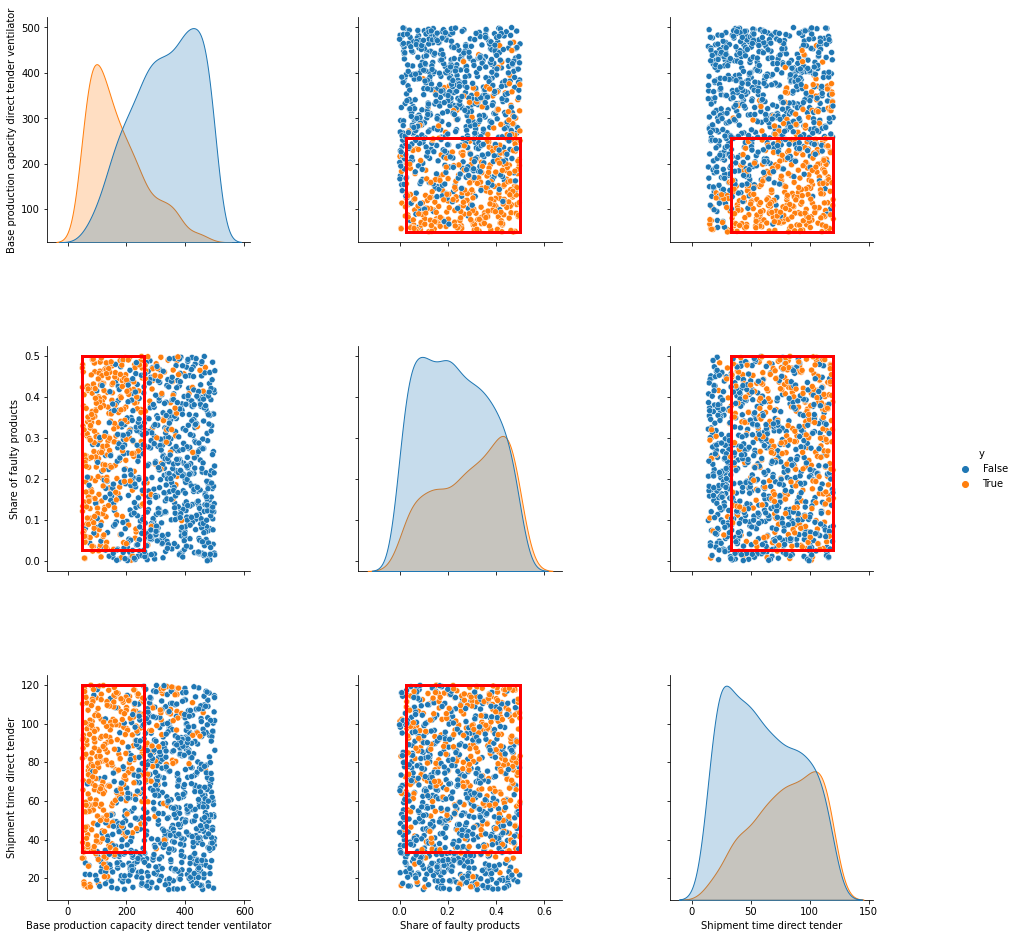

In [17]:
box1.select(20) 
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(15, 15)
# plt.savefig('./figures/step_4_scatter_plot_vent_box20.png')
plt.show()

### Inspect Box 19

coverage    0.768571
density     0.723118
id                19
mass           0.372
mean        0.723118
res_dim            3
Name: 19, dtype: object

                                                      box 19              \
                                                         min         max   
Base production capacity direct tender ventilator  50.302070  257.947595   
Shipment time direct tender                        29.787141  119.940069   
Share of faulty products                            0.026450    0.499568   

                                                                                   
                                                                        qp values  
Base production capacity direct tender ventilator  [-1.0, 1.0672070182562345e-34]  
Shipment time direct tender                          [0.001411577352048611, -1.0]  
Share of faulty products                              [0.16648649087325998, -1.0]  



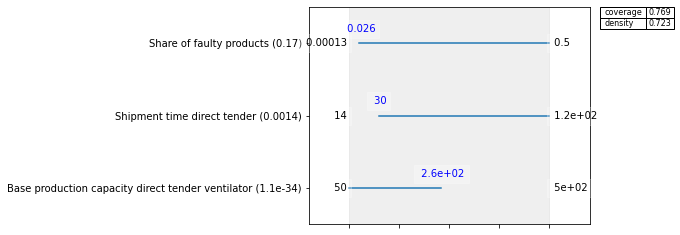

In [19]:
box1.inspect(19)
box1.inspect(19, style='graph')
# plt.savefig("./figures/prim_box19_inspect_vent.png")
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


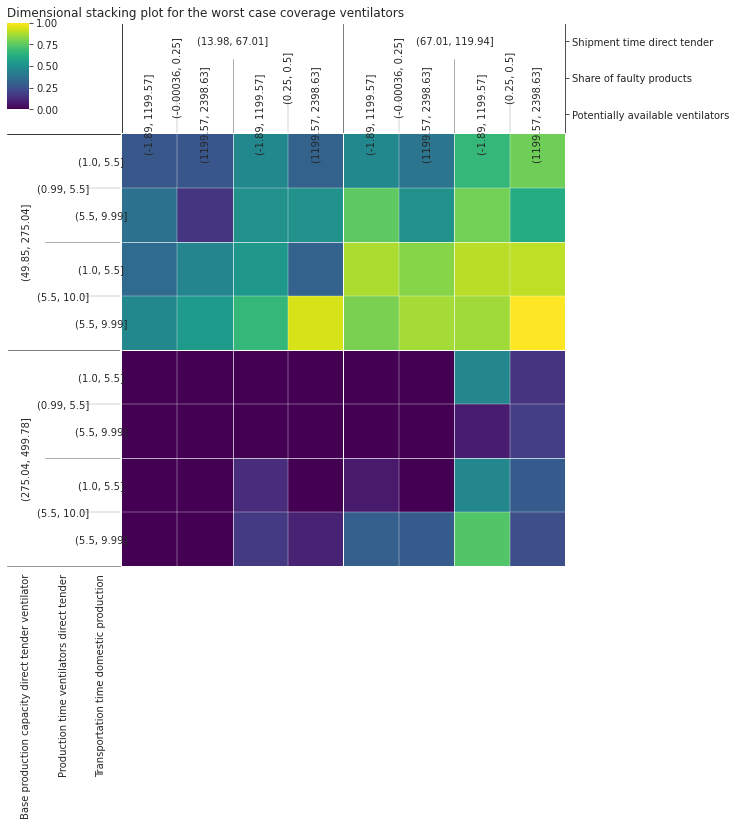

In [21]:
dimensional_stacking.create_pivot_plot(experiments, y, nbins =2,nr_levels=3, bin_labels=True,categories=True)
plt.title('Dimensional stacking plot for the worst case coverage ventilators', loc='left')
# plt.savefig('./Figures/step_4_dmn_stack_vent_box19.png')
plt.show()

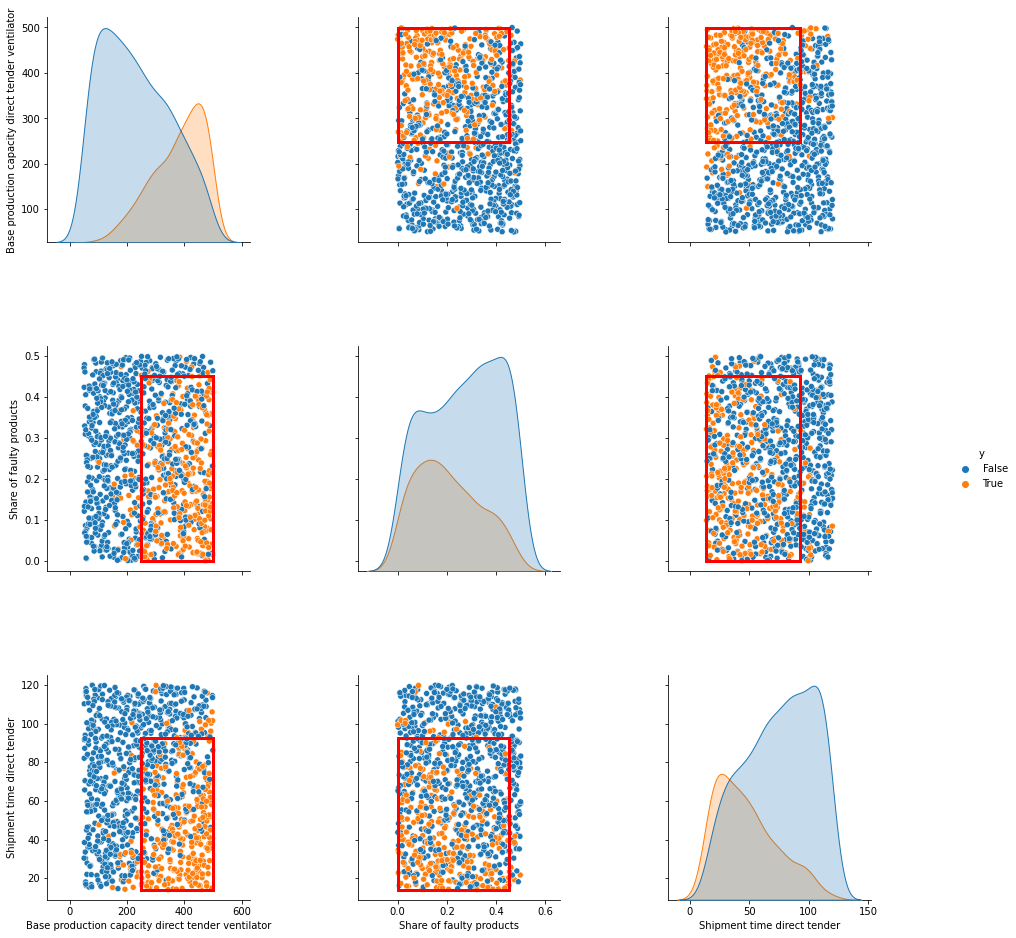

In [27]:
box1.select(19) 
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(15, 15)
# plt.savefig('./figures/step_4_scatter_plot_vent_box19.png')
plt.show()

## Scenario Discovery Best Case Ventilator

In [40]:
# identify the threshold for 30% of the best cases
df_outcome = outcomes['Coverage ventilator']
df_outcome = pd.DataFrame(df_outcome)
high_70_percent = df_outcome.quantile(0.7, axis = 0)

In [41]:
high_70_percent = high_70_percent.to_frame()
high_70_percent = high_70_percent[0.7].values[0]

In [42]:
#defining best case for coverage ventilator
y = outcomes['Coverage ventilator'] >high_70_percent

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 1000 points remaining, containing 300 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.091, coverage: 0.30333333333333334, density: 1.0 restricted_dimensions: 14


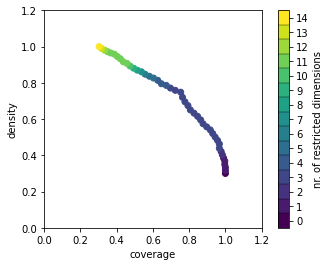

In [43]:
#plotting the trade off between coverage and density
prim_alg = prim.Prim(experiments, y, threshold  = 0.8) 
box2 = prim_alg.find_box()

box2.show_tradeoff()
# plt.savefig("./figures/prim_box_vent_best_case.png")
plt.show()

In [44]:
box2.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.300000,0,1.000,0.300000,0
1,1.000000,0.315789,1,0.950,0.315789,1
2,1.000000,0.332594,2,0.902,0.332594,1
3,0.996667,0.349299,3,0.856,0.349299,1
4,0.996667,0.367774,4,0.813,0.367774,1
5,0.990000,0.384715,5,0.772,0.384715,1
6,0.983333,0.402456,6,0.733,0.402456,2
7,0.976667,0.420977,7,0.696,0.420977,2
8,0.966667,0.438729,8,0.661,0.438729,3
9,0.966667,0.462520,9,0.627,0.462520,3


### Insprect Box 23

coverage    0.753333
density     0.748344
id                23
mass           0.302
mean        0.748344
res_dim            3
Name: 23, dtype: object

                                                       box 23              \
                                                          min         max   
Shipment time direct tender                         14.081992   78.073112   
Share of faulty products                             0.000135    0.452526   
Base production capacity direct tender ventilator  248.733721  499.783794   

                                                                                  
                                                                       qp values  
Shipment time direct tender                        [-1.0, 8.810475114428159e-16]  
Share of faulty products                             [-1.0, 0.03322101885871941]  
Base production capacity direct tender ventilator  [3.072341317383056e-25, -1.0]  



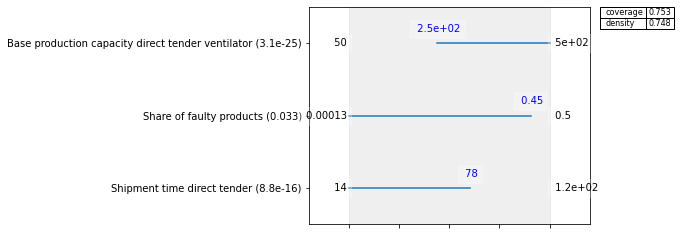

In [45]:
#box 23 is only box interesting for best case
box2.inspect(23)
box2.inspect(23, style='graph')
# plt.savefig("./figures/prim_box23_inspect_vent_bestcase.png")
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


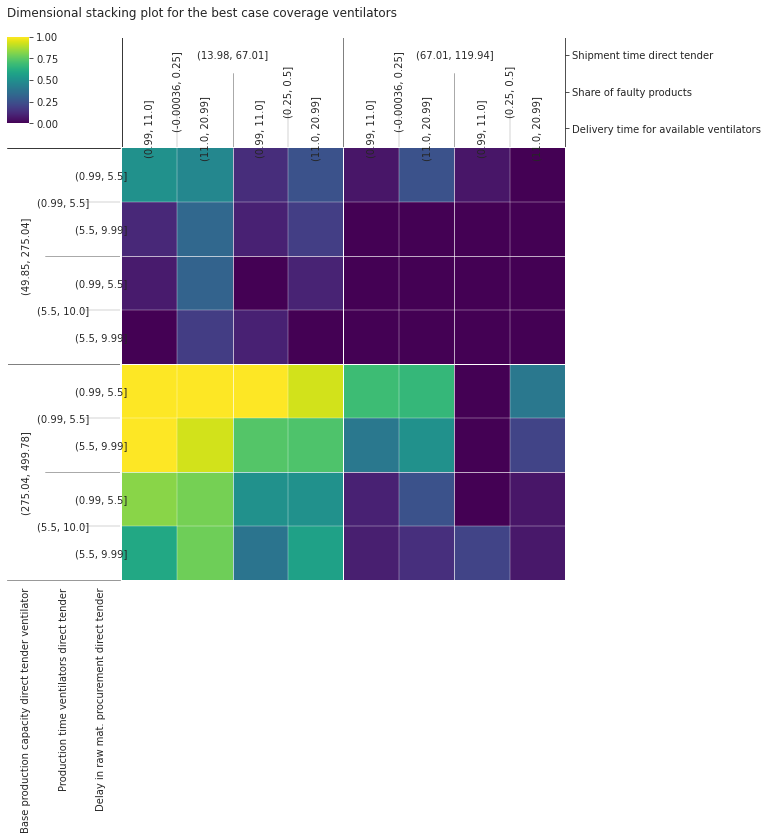

In [46]:
dimensional_stacking.create_pivot_plot(experiments, y, nbins =2, bin_labels=True)
plt.title('Dimensional stacking plot for the best case coverage ventilators', loc='left')
# plt.savefig('./Figures/step_4_dmn_stack_vent_box23_bestcase.png')
plt.show()

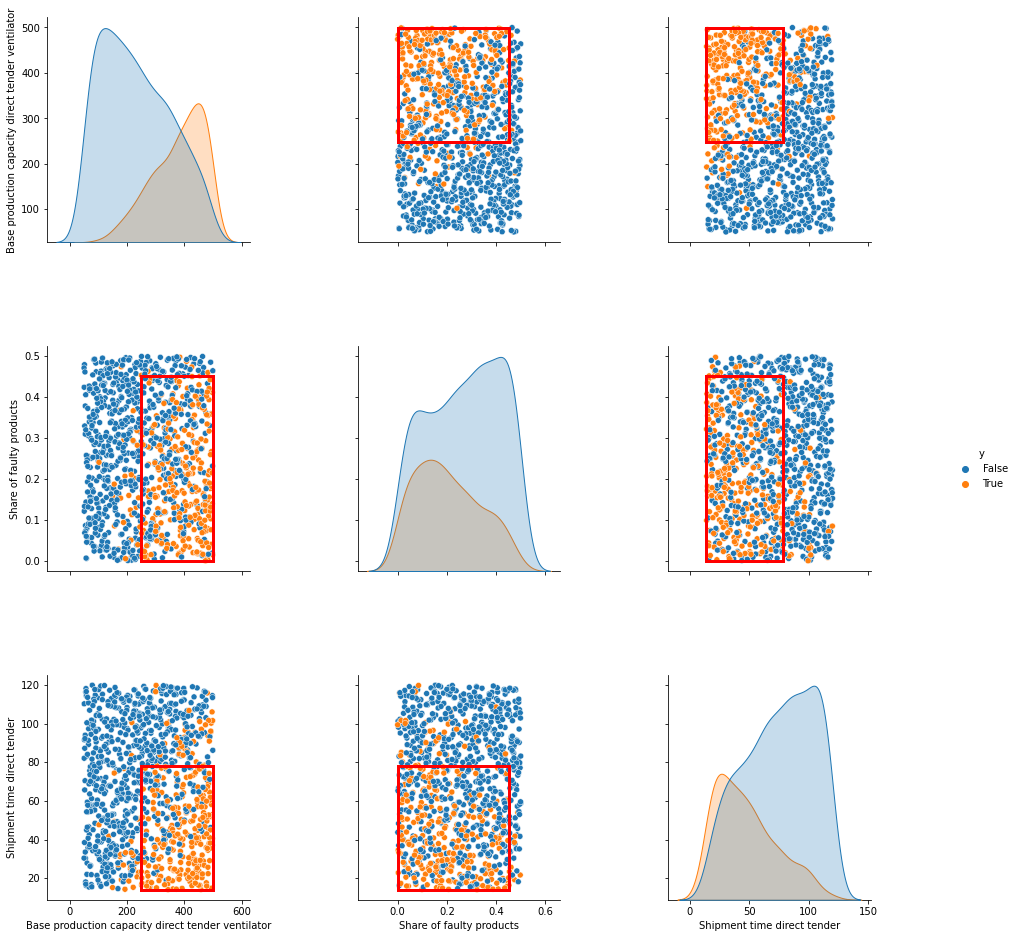

In [38]:
box2.select(23) 
box2.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(15, 15)
# plt.savefig('./figures/step_4_scatter_plot_vent_box19.png')
plt.show()